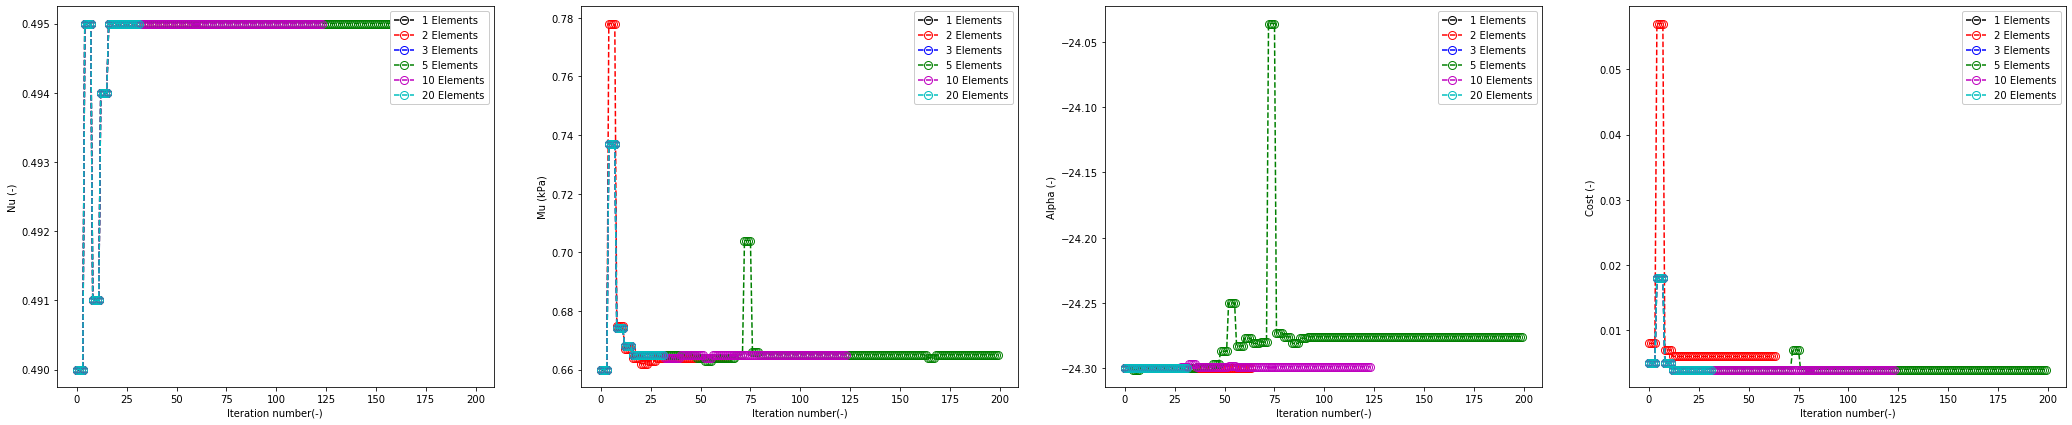

In [2]:
#########################################################################
### Plot the evolution of the parameter during optimization procedure ###
#########################################################################


import pandas as pd                       # Allows to use data in tables
import matplotlib.pyplot as plt           # Allows to do plots
import os


# Optimization Parameters
ConstitutiveModels = ['Ogden', 'Neo-Hookean']
ConstitutiveModel = ConstitutiveModels[0]

NumberElementsTested = [1, 2, 3, 5, 10, 20]

BCsTypes = ['Ideal', 'Fixed']
BCsType  = BCsTypes[0]


# Plot
plt.rc('figure', figsize=[36,7])
Colors = ['k', 'r', 'b', 'g', 'm', 'c']
fig = plt.figure()
Axes = (fig.add_subplot(1, 4, 1), fig.add_subplot(1, 4, 2), fig.add_subplot(1, 4, 3), fig.add_subplot(1, 4, 4))

for NumberElements in NumberElementsTested:

    df = pd.read_csv(os.path.join('OptimizationResults', BCsType, ConstitutiveModel, str(NumberElements) + 'Elements.txt'), sep=' ', decimal='.')
    
    if ConstitutiveModel == ConstitutiveModels[0]:
        Parameters = [df.Nu, df.Mu, df.Alpha, df.TotalCost]
        ParametersNames = ['Nu (-)', 'Mu (kPa)', 'Alpha (-)', 'Cost (-)']
    elif ConstitutiveModel == ConstitutiveModel[1]:
        Parameters = [df.Nu, df.Mu, df.Lambda, df.TotalCost]
        ParametersNames = ['Nu (-)', 'Mu (kPa)', 'Lambda (-)', 'Cost (-)']
    
    for Position in range(len(ParametersNames)):
        ax = Axes[Position]
        ax.plot(Parameters[Position],  color = Colors[NumberElementsTested.index(NumberElements)], linestyle = '--', marker = 'o', markersize = 8, fillstyle='none', label=str(NumberElements)+' Elements')
        ax.legend(loc='upper right', frameon=True, framealpha=1)
        ax.set_xlabel('Iteration number(-)')
        ax.set_ylabel(ParametersNames[Position])
    
plt.savefig(os.path.join('Plots', 'ParametersEvolution' + BCsType + ConstitutiveModel + '.pdf'))
plt.show()


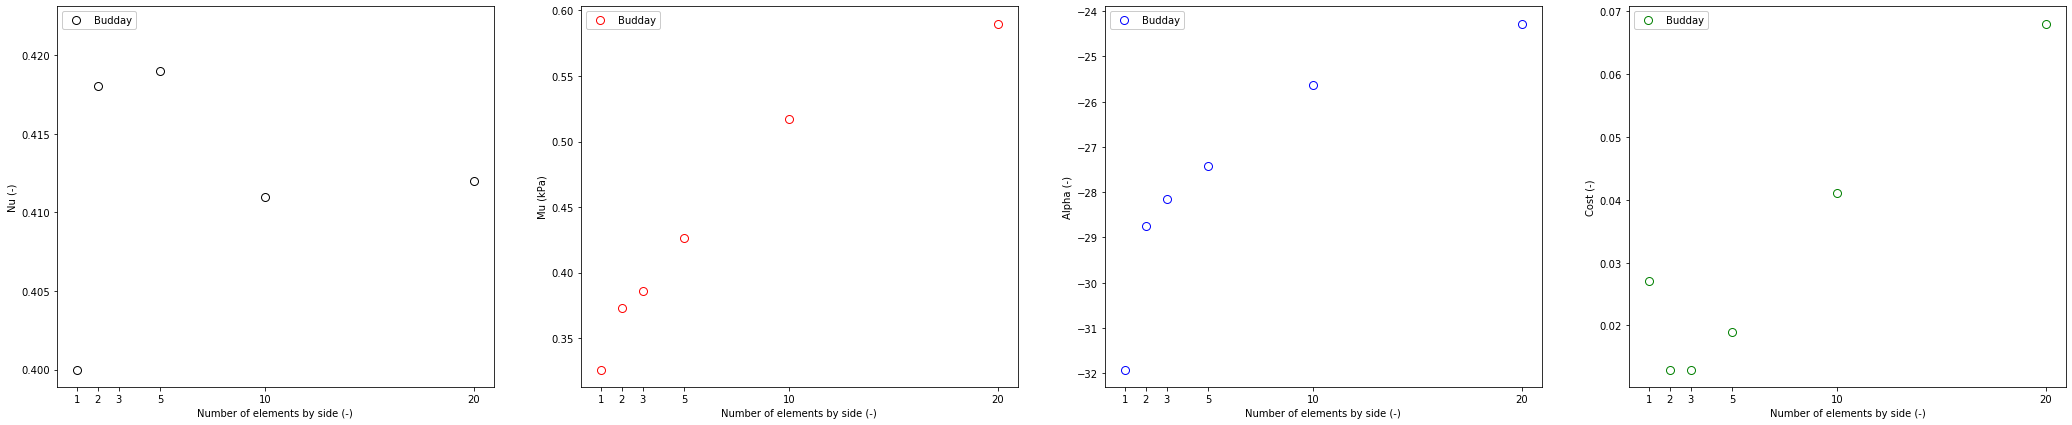

In [4]:
#########################################################################
########### Plot the final values after optimization procedure ##########
#########################################################################


import pandas as pd                       # Allows to use data in tables
import matplotlib.pyplot as plt           # Allows to do plots


# Optimization Parameters
ConstitutiveModels = ['Ogden', 'Neo-Hookean']
ConstitutiveModel = ConstitutiveModels[0]

NumberElementsTested = [1, 2, 3, 5, 10, 20]

BCsTypes = ['Ideal', 'Fixed']
BCsType  = BCsTypes[1]


# List to store final parameter values
Nus     = []
Mus     = []
Alphas  = []
Lambdas = []
Costs   = []


# Read final parameter values
for NumberElements in NumberElementsTested:

    df = pd.read_csv(os.path.join('OptimizationResults', BCsType, ConstitutiveModel, str(NumberElements) + 'Elements.txt'), sep=' ', decimal='.')
    
    FinalValues = df.iloc[-1]
    FinalCosts = df.iloc[-2]

    Nus.append(FinalValues.Nu)
    Mus.append(FinalValues.Mu)
    Costs.append(FinalCosts.TotalCost)
    
    if ConstitutiveModel == ConstitutiveModels[0]:
        Alphas.append(FinalValues.Alpha)
        Parameters = [Nus, Mus, Alphas, Costs]
        ParametersNames = ['Nu (-)', 'Mu (kPa)', 'Alpha (-)', 'Cost (-)']
    elif ConstitutiveModel == ConstitutiveModel[1]:
        Lambdas.append(FinalValues.Lambda)
        Parameters = [Nus, Mus, Lambdas, Costs]
        ParametersNames = ['Nu (-)', 'Mu (kPa)', 'Lambda (-)', 'Cost (-)']
        

# Plots
plt.rc('figure', figsize=[36,7])
fig = plt.figure()
#fig.suptitle('Final Values')
Colors = ['k', 'r', 'b', 'g']

for Position in range(len(ParametersNames)):
    ax = fig.add_subplot(1, 4, Position+1)
    ax.cla()
    ax.plot(NumberElementsTested, Parameters[Position],  color = Colors[Position], linestyle = 'none', marker = 'o', markersize = 8, fillstyle='none', label='Budday')
    ax.set_xlabel('Number of elements by side (-)')
    ax.set_ylabel(ParametersNames[Position])
    plt.xticks(NumberElementsTested)
    ax.legend(loc='upper left', frameon=True, framealpha=1)

plt.savefig(os.path.join('Plots', 'OptimizedParameters' + BCsType + ConstitutiveModel + '.pdf'))
plt.show()


In [9]:
Parameters[0]

[0.4,
 0.418,
 0.42200000000000004,
 0.419,
 0.41100000000000003,
 0.41200000000000003]

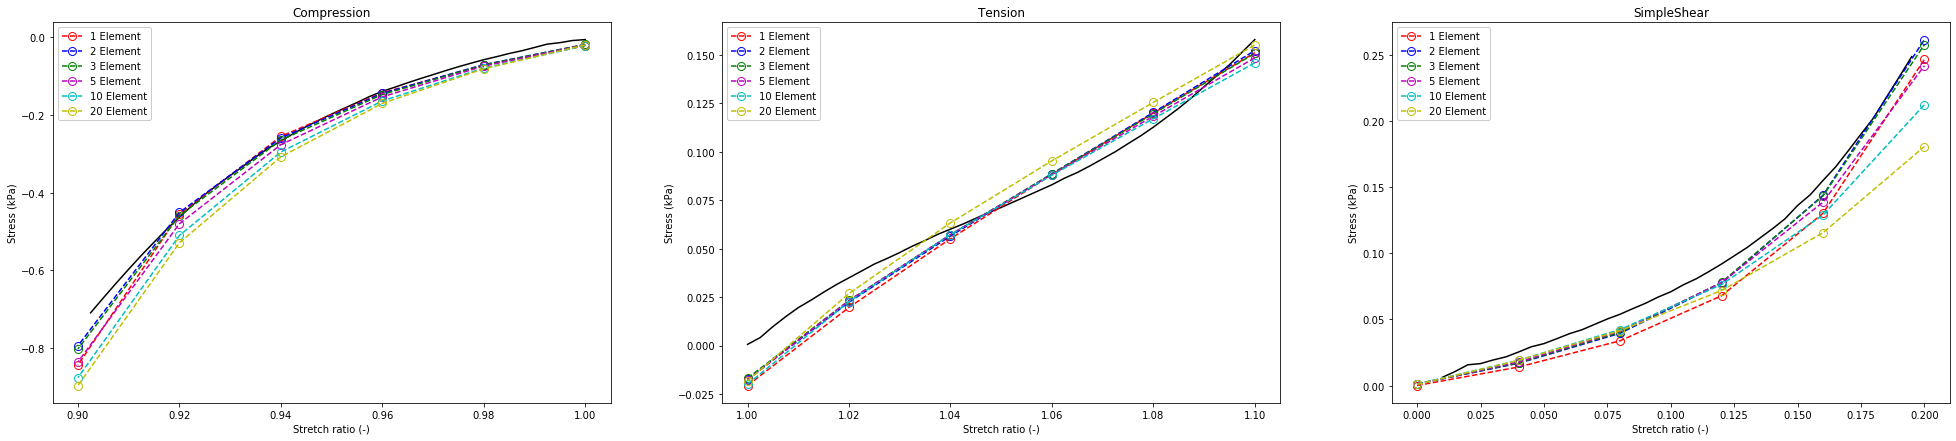

In [1]:
#########################################################################
######################### Plot Simulation Results #######################
#########################################################################


import pandas as pd                       # Allows to use data in tables
import matplotlib.pyplot as plt           # Allows to do plots
import os


# Simulation Parameters
ConstitutiveModels = ['Ogden', 'Neo-Hookean']
ConstitutiveModel = ConstitutiveModels[0]

NumberElementsTested = [1, 2, 3, 5, 10, 20]

LoadCases = ['Compression', 'Tension', 'SimpleShear']

BCsTypes = ['Ideal', 'Fixed']
BCsType  = BCsTypes[1]



plt.rc('figure', figsize=[34,7])
fig = plt.figure()
#fig.suptitle('Ideal Boundary Conditions Simulation Results')
Colors = ['r', 'b', 'g', 'm', 'c', 'y']

for LoadCase in LoadCases:
    
    dfd   = pd.read_csv(os.path.join('ExperimentalData', 'CR_' + LoadCase + '_ExpDat.csv'), sep=';', decimal=',', header=None)
    
    ax = fig.add_subplot(1, 3, LoadCases.index(LoadCase)+1)
    ax.cla()
    ax.plot(dfd[0], dfd[1],  color = 'k', linestyle = '-')
    
    for NumberElements in NumberElementsTested:
        dfs  = pd.read_csv(os.path.join('SimulationResults', BCsType, ConstitutiveModel, str(NumberElements) + 'Elements_' + LoadCase + '.csv'), sep=',', decimal='.', usecols=[1,2])
        if pd.isnull(dfs.P[0]) == False:
            ax.plot(dfs.Stretches, dfs.P,  color = Colors[NumberElementsTested.index(NumberElements)], linestyle = '--', marker = 'o', markersize = 8, fillstyle='none', label= str(NumberElements) + ' Element')

    ax.set_xlabel('Stretch ratio (-)')
    ax.set_ylabel('Stress (kPa)')
    ax.legend(loc='upper left', frameon=True, framealpha=1)
    plt.title(LoadCase)

plt.savefig(os.path.join('Plots', 'Sensitivity' + BCsType + ConstitutiveModel + '.pdf'))

plt.show()